# Import Keras, Numpy, H5py

In [2]:
from __future__ import print_function
import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import RepeatVector,Reshape
from keras import backend as K
import h5py
import numpy as np

path = 'C:\\Users\\user\\university\\year3\\sem6\\tcg172\\'
batch_size = 128
num_classes = 10
epochs = 10


Using TensorFlow backend.


# Load MNIST data and labels

In [3]:
# load data from NPZ file
all_data = np.load(path+'mnist_points_classification.npz')

# input_shape is (width,height) each point is of shape (x,y) = (1 row,2 columns) 
num_of_points = 100
point = 2

#test arrays
train_labels = all_data['train_labels']
train_data = all_data['train_data']
#validation arrays
valid_labels = all_data['valid_labels']
valid_data = all_data['valid_data']
#test arrays
test_labels1 = all_data['test_labels']
test_data = all_data['test_data']

train_data = train_data.astype('float32')
valid_data = valid_data.astype('float32')
test_data = test_data.astype('float32')

train_data = train_data.reshape(train_data.shape[0],1,num_of_points, point)
valid_data = valid_data.reshape(valid_data.shape[0],1,num_of_points, point)
test_data = test_data.reshape(test_data.shape[0],1,num_of_points, point)

print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)

(50000, 1, 100, 2)
(10000, 1, 100, 2)
(50000,)


# Create dataset samples for quick testing of the model

In [4]:
# creating samples

sample_size= 8000
sample_train_labels= np.empty(sample_size)
sample_train_data= np.empty([sample_size,1,100,2])
count = np.zeros(10)
i=0
#train samples
while i < sample_size:
    for label in train_labels:
        if count[label] < sample_size/10:
            sample_train_labels[i] = label
            sample_train_data[i] = train_data[i]
            count[label]= count[label]+1
            i=i+1
# else:
#     print(count)
    
#validation samples
i=0
count = np.zeros(10)
sample_valid_labels= np.empty(sample_size//4)
sample_valid_data= np.empty([sample_size//4,1,100,2])
while i < sample_size/4:
    for label in valid_labels:
        if count[label] < sample_size/40:
            sample_valid_labels[i] = label
            sample_valid_data[i] = valid_data[i]
            count[label]= count[label]+1
            i=i+1
# else:
#     print(count)

#test samples
i=0
count = np.zeros(10)
sample_test_labels= np.empty(sample_size//4)
sample_test_data= np.empty([sample_size//4,1,100,2])
while i < sample_size/4:
    for label in test_labels1:
        if count[label] < sample_size/40:
            sample_test_labels[i] = label
            sample_test_data[i] = test_data[i]
            count[label]= count[label]+1
            i=i+1
# else:
#     print(count) 
print('samples: train shape',sample_train_data.shape)  
print('samples: valid shape',sample_valid_data.shape)  
print('samples:  test shape',sample_test_data.shape)  

samples: train shape (8000, 1, 100, 2)
samples: valid shape (2000, 1, 100, 2)
samples:  test shape (2000, 1, 100, 2)


# Change labels to one hot encoding (samples and full sets)

In [5]:
# convert class vectors to binary class matrices
train_labels = keras.utils.to_categorical(train_labels, num_classes)
valid_labels = keras.utils.to_categorical(valid_labels, num_classes)
test_labels  = keras.utils.to_categorical(test_labels1, num_classes)

sample_train_labels = keras.utils.to_categorical(sample_train_labels, num_classes)
sample_valid_labels = keras.utils.to_categorical(sample_valid_labels, num_classes)
sample_test_labels  = keras.utils.to_categorical(sample_test_labels, num_classes)
print(test_labels.shape)
print()
print('changed labels to one hot encoding')

(10000, 10)

changed labels to one hot encoding


# Choose Sample or Full dataset

In [6]:
use_sample = 0

# the Classification Model

In [7]:
inputs = Input(shape=(1,100,2))

#implement 2X2 TNET here

x = Conv2D(64,(1,1),strides=1, activation='relu')(inputs)
x = Conv2D(64,(1,1), strides=1, activation='relu')(x)

#missing 64X64 TNET here

x = Conv2D(64,(1,1), strides=1, activation='relu')(x)

local_features = Flatten()(x)

x = Conv2D(128,(1,1), strides=1, activation='relu')(x)
x = Conv2D(1024,(1,1), strides=1, activation='relu')(x)

#max pooling layer
x = MaxPooling2D((1,100), strides=1, padding='valid')(x)
x = Flatten()(x)

global_features = x

#last part

x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])



# Train the model on the chosen dataset 

In [ ]:
if use_sample:
    model.fit(sample_train_data,sample_train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(sample_valid_data, sample_valid_labels))
    score = model.evaluate(sample_test_data, sample_test_labels, verbose=0)
else: 
    model.fit(train_data,train_labels,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(valid_data, valid_labels))
    score = model.evaluate(test_data,test_labels, verbose=0)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Load or Save Weights

In [16]:
# model.save_weights('classification.h5')

In [8]:
model.load_weights('classification_92-86.h5')

# Visualization of results

In [9]:
from matplotlib import pyplot as plt
all_mnist = np.load(path+'mnist.npz')
mnist = all_mnist['test_data']

# show some visual info about a digit, this script was written for the report

please select a digit from 0 to 9: 8


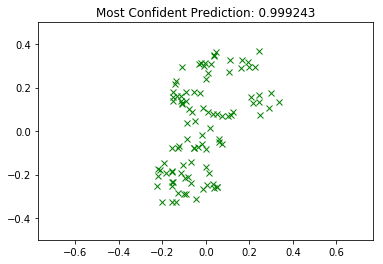

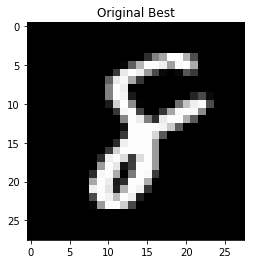

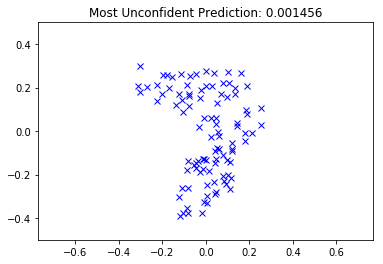

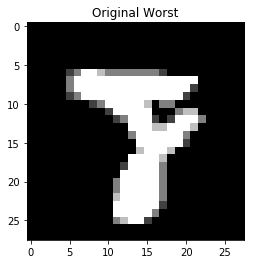

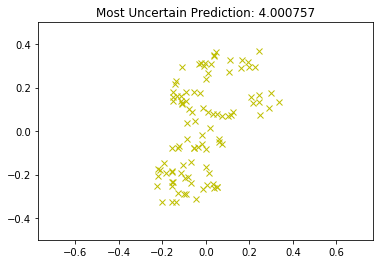

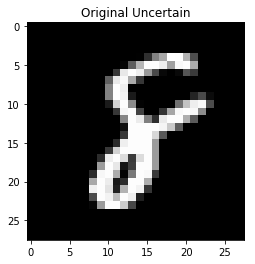

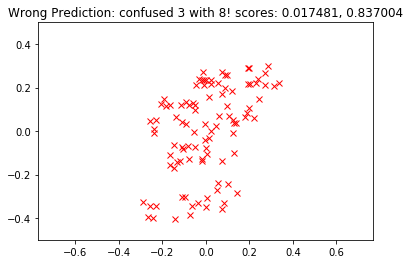

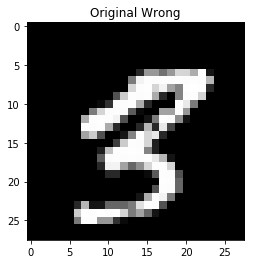

In [11]:
digit = int(input('please select a digit from 0 to 9: '))

preds = model.predict(test_data)

min=10
minindex=-1
max=0
maxindex=-1
avg=100
avgindex=-1

wrongindex= -1
confused_digit=-1
wrongscore=-1
digit_score=-1

for i in range(0,len(preds)):
    if test_labels1[i]==digit: 
        if preds[i][digit]<min:
            minindex=i
            min = preds[i][digit]
        if preds[i][digit]>max:
            maxindex=i
            max = preds[i][digit]
        x = abs(preds[i][digit]-5)
        if abs(x)<avg:
            avgindex=i
            avg = x
            
        if np.amax(preds[i])!=preds[i][digit]:
            wrongindex=i
            confused_digit = test_labels1[i]
            wrongscore = preds[i][test_labels1[i]]
            digit_score = preds[i][digit]
    else:
        if np.amax(preds[i])==preds[i][digit]:
            wrongindex=i
            confused_digit = test_labels1[i]
            wrongscore = preds[i][test_labels1[i]]
            digit_score = preds[i][digit]
            
max = float(format(max, '.6f'))
min = float(format(min, '.6f'))
avg = float(format(avg, '.6f'))
wrongscore = float(format(wrongscore, '.6f'))
digit_score = float(format(digit_score, '.6f'))

plt.title('Most Confident Prediction: {}'.format(max))
plt.plot(test_data[maxindex][0][:-1,0],test_data[maxindex][0][:-1,1],'xg')
# plt.plot(p_front[:-1,0],p_front[:-1,1],'xb')
plt.axis('equal')
plt.axis([-0.5,0.5,-0.5,0.5])
plt.show()

plt.title('Original Best')
plt.imshow(mnist[maxindex].reshape(28,28), cmap='gray')
plt.show()

plt.title('Most Unconfident Prediction: {}'.format(min))
plt.plot(test_data[minindex][0][:-1,0],test_data[minindex][0][:-1,1],'xb')
plt.axis('equal')
plt.axis([-0.5,0.5,-0.5,0.5])
plt.show()

plt.title('Original Worst')
plt.imshow(mnist[minindex].reshape(28,28), cmap='gray')
plt.show()

plt.title('Most Uncertain Prediction: {}'.format(avg))
plt.plot(test_data[avgindex][0][:-1,0],test_data[avgindex][0][:-1,1],'xy')
plt.axis('equal')
plt.axis([-0.5,0.5,-0.5,0.5])
plt.show()

plt.title('Original Uncertain')
plt.imshow(mnist[avgindex].reshape(28,28), cmap='gray')
plt.show()

if wrongscore!=-1:
    plt.title('Wrong Prediction: confused {} with {}! scores: {}, {}'.format(confused_digit,digit,wrongscore,digit_score))
    plt.plot(test_data[wrongindex][0][:-1,0],test_data[wrongindex][0][:-1,1],'xr')
    plt.axis('equal')
    plt.axis([-0.5,0.5,-0.5,0.5])
    plt.show()
    
    plt.title('Original Wrong')
    plt.imshow(mnist[wrongindex].reshape(28,28), cmap='gray')
    plt.show()
else:
    print('No prediction guessed this digit falsely!')


# Functions built to assist further analysis of results

In [54]:
# receives a predictions array and returns the index of the 10 most uncertain results
def most_uncertain(arr):
    arr = arr-[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
    for i in range(0,10000):
        for j in range(0,10):
            if arr[i][j]<0:
                arr[i][j]=-1*arr[i][j]
        arr[i].sort()
        
    uncertain_indexes = np.empty(10)
    minis = np.empty(10)
    minis.fill(10)
    for k in range(0,10000):
        if arr[k][0]<minis.any():
#             print(arr[k][0])
            for i in range(0,10):
                if arr[k][0]<minis[i]:
                    minis[i]=arr[k][0]
                    uncertain_indexes[i]=k
                    break
    return uncertain_indexes 

In [70]:
#return an index of digit a predicted as digit b
def a_predicted_as_b(a,b,preds,truelbs):
    for i in range(0,10000):
        if truelbs[i]==a:
            if preds[i][b]>preds[i][a]:
                return i

In [65]:
preds_1 = model.predict(test_data)

# show uncertain results

In [ ]:
x = most_uncertain(preds_1)
for index in x:
    index=int(index)
    plt.plot(test_data[index][0][:-1,0],test_data[index][0][:-1,1],'xr')
    plt.axis('equal')
    plt.axis([-0.5,0.5,-0.5,0.5])
    plt.show()
    
    plt.imshow(mnist[index].reshape(28,28), cmap='gray')
    plt.show()

# show an error: digit a predicted as digit b (for the report)

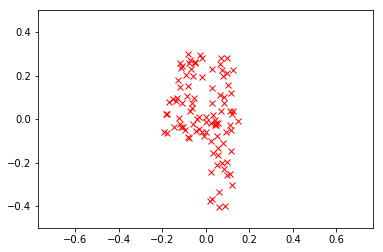

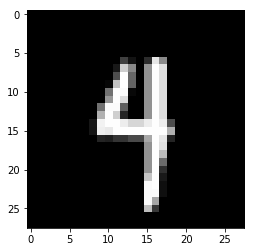

In [73]:
y = a_predicted_as_b(4,9,preds_1,test_labels1)
plt.plot(test_data[y][0][:-1,0],test_data[y][0][:-1,1],'xr')
plt.axis('equal')
plt.axis([-0.5,0.5,-0.5,0.5])
plt.show()

plt.imshow(mnist[y].reshape(28,28), cmap='gray')
plt.show()

# Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
def create_decimal_predictions(arr):
    decimal_labels = np.empty(10000)
    for i in range(0,10000):
        maxi=0
        labels=arr[i]
        index=-1
        for j in range(0,10):
            if labels[j]>maxi:
                maxi=labels[j]
                index=j
        decimal_labels[i]=index
    return decimal_labels

In [12]:
model_preds = model.predict(test_data)

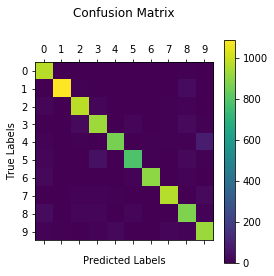

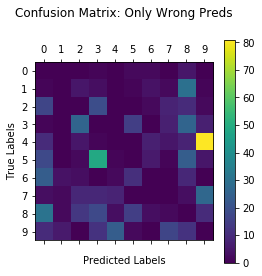

In [14]:
decimal_labels=create_decimal_predictions(model_preds)
cf_matrix = confusion_matrix(test_labels1,decimal_labels)

ticks = np.arange(10)
plt.matshow(cf_matrix)
plt.title('Confusion Matrix\n\n')
plt.xlabel('\nPredicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks)
plt.yticks(ticks)
plt.colorbar()
plt.show()

for i in range(0,10):
    cf_matrix[i][i]=0
    
plt.matshow(cf_matrix)
plt.title('Confusion Matrix: Only Wrong Preds\n\n')
plt.xlabel('\nPredicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks)
plt.yticks(ticks)
plt.colorbar()
plt.show()

# per class accuracy 

In [9]:
preds_2 = model.predict(test_data)

In [10]:
def get_class_acc(preds,truth):
    total = np.zeros(10)
    hits = np.zeros(10)
    for i in range(0,10000):
        true = truth[i] 
        total[true]=total[true]+1
        copy = np.array(preds[i])
        copy.sort()
        if copy[9]==preds[i][true]:
            hits[true]=hits[true]+1
    for i in range(0,10):
        total[i]=hits[i]/total[i]
    return total    

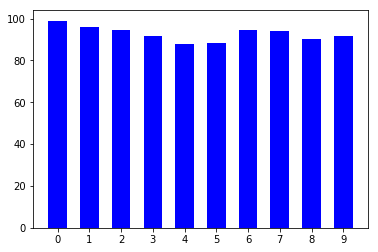

In [23]:
classes_acc = get_class_acc(preds_2,test_labels1)
classes_acc = classes_acc*100
x = [0,1,2,3,4,5,6,7,8,9]
width = 1/1.7
plt.bar(x,classes_acc,width,color='blue')
plt.xticks(x)
plt.show()